# Hierarchical_Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Data Scientist\Clustering\Agglomerative clustering\Dataset\crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df = df.rename(columns = {'Unnamed: 0':'States'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# EDA

In [ ]:
# Measure of central tendency(first moment business decision)

In [7]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64


            States  Murder  Assault  UrbanPop  Rape
0          Alabama     2.1    120.0      66.0  14.9
1           Alaska     2.2      NaN      80.0  16.3
2          Arizona     2.6      NaN       NaN   NaN
3         Arkansas     6.0      NaN       NaN   NaN
4       California     9.0      NaN       NaN   NaN
5         Colorado    13.2      NaN       NaN   NaN
6      Connecticut    15.4      NaN       NaN   NaN
7         Delaware     NaN      NaN       NaN   NaN
8          Florida     NaN      NaN       NaN   NaN
9          Georgia     NaN      NaN       NaN   NaN
10          Hawaii     NaN      NaN       NaN   NaN
11           Idaho     NaN      NaN       NaN   NaN
12        Illinois     NaN      NaN       NaN   NaN
13         Indiana     NaN      NaN       NaN   NaN
14            Iowa     NaN    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\648249112.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\648249112.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In [ ]:
# Measure of Dispersion(second moment business decision)

In [8]:
print(df.var())
print('\n')
print(df.std())

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\2422590520.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\2422590520.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())


In [ ]:
# Third moment business decision

In [9]:
print(df.skew())

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\1926848427.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())


In [ ]:
# Fourth moment business decision

In [10]:
print(df.kurt())

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11380\3132107899.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.kurt())


In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
# find out the duplicates

duplicate = df.duplicated()
duplicate.sum()

0

In [14]:
# missing values

df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
# Outlier analysis using box plot

Murder         Axes(0.125,0.11;0.168478x0.77)
Assault     Axes(0.327174,0.11;0.168478x0.77)
UrbanPop    Axes(0.529348,0.11;0.168478x0.77)
Rape        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

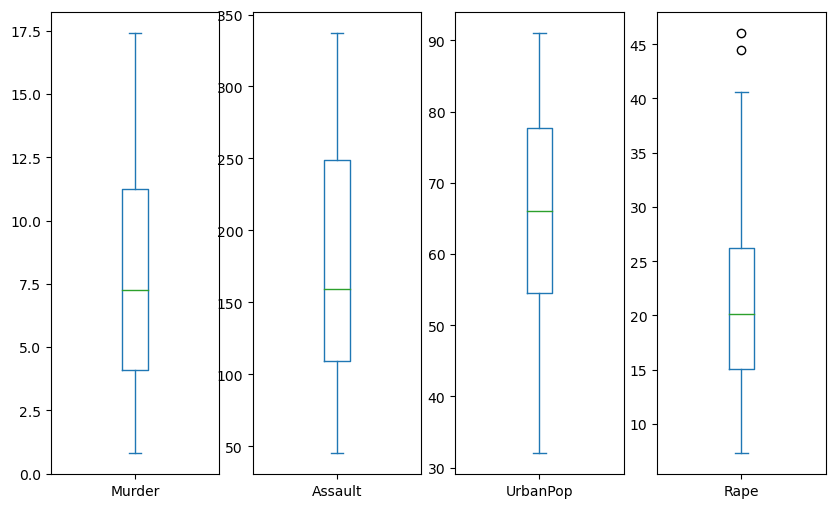

In [15]:
df.plot(kind = 'box', subplots = True,sharey = False,figsize = (10,6))

# outlier in Rape but i think we take that values becoz this values may be came in future as well.

In [16]:
from feature_engine.outliers import Winsorizer

In [17]:
wins_iqr = Winsorizer(capping_method = 'iqr',
                     tail = 'right',
                     fold = 1.5,
                     variables = ['Rape'])

In [18]:
df['Rape'] = pd.DataFrame(wins_iqr.fit_transform(df[['Rape']]))

Murder         Axes(0.125,0.11;0.168478x0.77)
Assault     Axes(0.327174,0.11;0.168478x0.77)
UrbanPop    Axes(0.529348,0.11;0.168478x0.77)
Rape        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

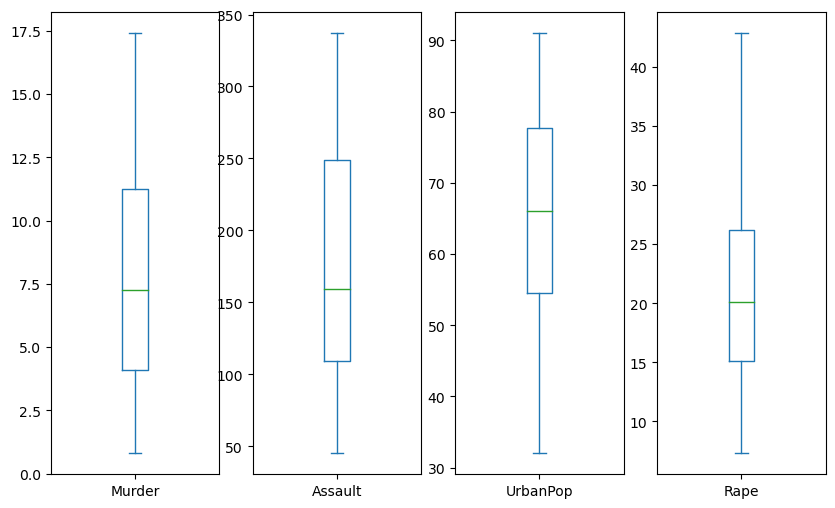

In [19]:
df.plot(kind = 'box', subplots = True,sharey = False,figsize = (10,6))


In [20]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.200
1,Alaska,10.0,263,48,42.825
2,Arizona,8.1,294,80,31.000
3,Arkansas,8.8,190,50,19.500
4,California,9.0,276,91,40.600


In [21]:
df_cate = df.iloc[ : , :1]
df_cate.head()

,States
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [22]:
df_num = df.iloc[ : ,1: ]
df_num.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600


In [ ]:
# find how many unique values

In [19]:
df_cate.States.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [23]:
import scipy.stats as stats
import pylab

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 0.8,  2.1,  2.1,  2.2,  2.2,  2.6,  2.6,  2.7,  3.2,  3.3,  3.4,
          3.8,  4. ,  4.3,  4.4,  4.9,  5.3,  5.7,  5.9,  6. ,  6. ,  6.3,
          6.6,  6.8,  7.2,  7.3,  7.4,  7.9,  8.1,  8.5,  8.8,  9. ,  9. ,
          9.7, 10. , 10.4, 11.1, 

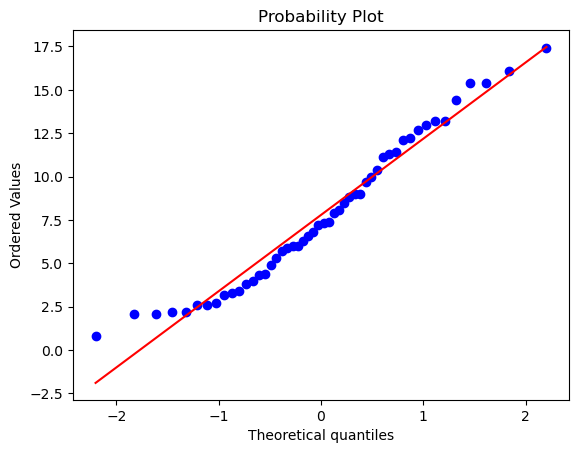

In [24]:
# Murder
stats.probplot(df_num['Murder'],dist = 'norm',plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 45,  46,  48,  53,  56,  57,  72,  81,  83,  86, 102, 106, 109,
         109, 110, 113, 115, 120, 120, 120, 145, 149, 151, 156, 159, 159,
         161, 174, 178, 188, 190, 201, 204, 211, 236, 238, 249, 249, 252,
         254, 255, 259, 263, 276, 27

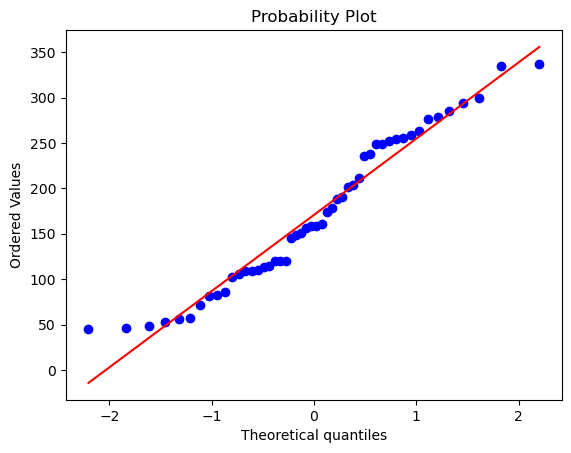

In [25]:
# Assault
stats.probplot(df_num['Assault'], dist = 'norm',plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([32, 39, 44, 44, 45, 45, 48, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59,
         60, 60, 62, 63, 65, 66, 66, 66, 66, 67, 67, 68, 70, 70, 72, 72, 73,
         74, 75, 77, 78, 80, 80, 80, 80, 81, 83, 83, 85, 86, 87, 89, 91],
        dtype=int64)),
 (14.73

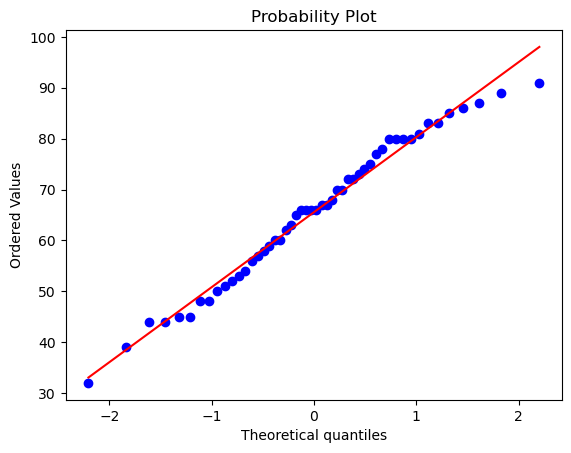

In [26]:
# UrbanPop
stats.probplot(df_num['UrbanPop'],dist = 'norm', plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 7.3  ,  7.8  ,  8.3  ,  9.3  ,  9.5  , 10.8  , 11.1  , 11.2  ,
         11.3  , 12.8  , 14.2  , 14.9  , 14.9  , 15.6  , 15.8  , 16.1  ,
         16.3  , 16.3  , 16.4  , 16.5  , 17.1  , 18.   , 18.8  , 19.5  ,
         20.   , 20.2  , 20.7  , 21.   

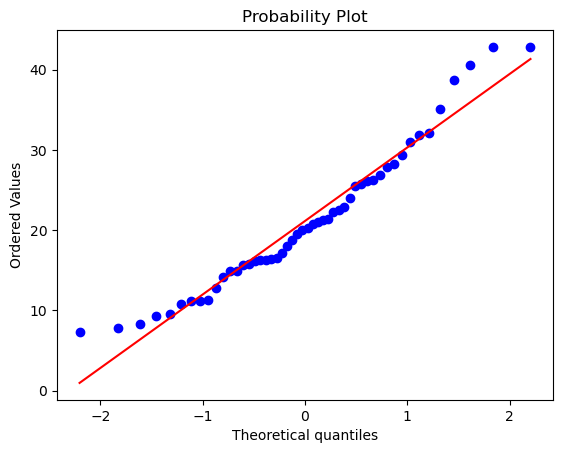

In [27]:
# Rape
stats.probplot(df_num['Rape'],dist = 'norm',plot = pylab)

In [ ]:
# Bivariate plot

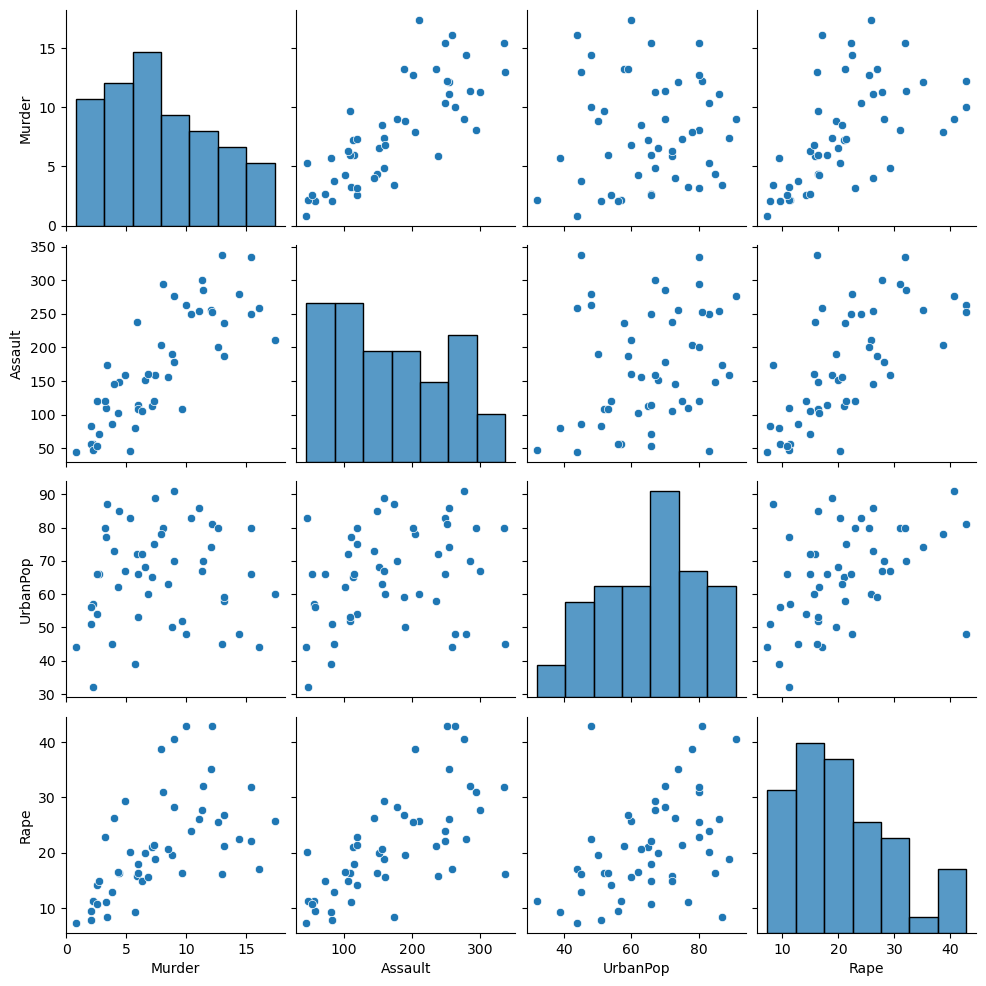

In [28]:
sns.pairplot(df_num)

In [29]:
# find out the correlation
df_num.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.569678
Assault,0.801873,1.000000,0.258872,0.672108
UrbanPop,0.069573,0.258872,1.000000,0.419388
Rape,0.569678,0.672108,0.419388,1.000000


In [ ]:
# Normalize the data using MinMaxScaler

In [30]:
df_num.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600


In [31]:
col = list(df_num)
col

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns = col, index = df_num.index)
df_num.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.391274
1,0.554217,0.746575,0.271186,1.000000
2,0.439759,0.852740,0.813559,0.667136
3,0.481928,0.496575,0.305085,0.343420
4,0.493976,0.791096,1.000000,0.937368


In [35]:
df_num.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


In [36]:
df_cate.head()

,States
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [37]:
df_cate = pd.get_dummies(df_cate,drop_first = True)
df_cate.head()

,States_Alaska,States_Arizona,States_Arkansas,States_California,States_Colorado,States_Connecticut,States_Delaware,States_Florida,States_Georgia,States_Hawaii,...,States_South Dakota,States_Tennessee,States_Texas,States_Utah,States_Vermont,States_Virginia,States_Washington,States_West Virginia,States_Wisconsin,States_Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data = pd.concat([df_cate,df_num],axis = 1)

In [39]:
data.head()

,States_Alaska,States_Arizona,States_Arkansas,States_California,States_Colorado,States_Connecticut,States_Delaware,States_Florida,States_Georgia,States_Hawaii,...,States_Vermont,States_Virginia,States_Washington,States_West Virginia,States_Wisconsin,States_Wyoming,Murder,Assault,UrbanPop,Rape
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.746988,0.654110,0.440678,0.391274
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.554217,0.746575,0.271186,1.000000
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.439759,0.852740,0.813559,0.667136
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.481928,0.496575,0.305085,0.343420
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.493976,0.791096,1.000000,0.937368


In [40]:
data.describe()

,States_Alaska,States_Arizona,States_Arkansas,States_California,States_Colorado,States_Connecticut,States_Delaware,States_Florida,States_Georgia,States_Hawaii,...,States_Vermont,States_Virginia,States_Washington,States_West Virginia,States_Wisconsin,States_Wyoming,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.420964,0.430685,0.568475,0.389444
std,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,...,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197289,0.219178,0.381356,0.218860
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388554,0.390411,0.576271,0.360310
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Model Building

In [41]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [42]:
from sklearn.cluster import AgglomerativeClustering

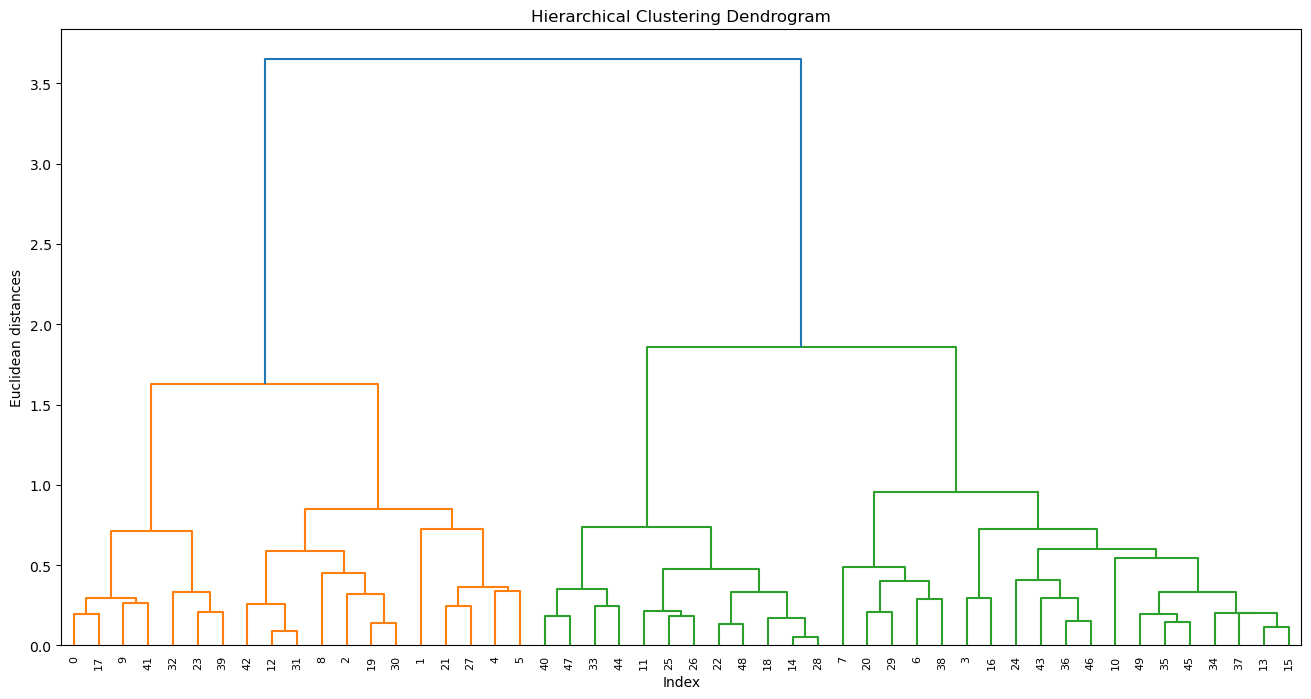

In [43]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_num, method  = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# data
# single = 0.0313
# complete = 0.0391
# average = 0.06289
# ward = 0.03931
# ward n_clusters = 2 = 0.0971 = 0.09869

In [48]:
a = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

In [49]:
a1 = a.fit_predict(df_num)
a1

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
a.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
cluster_labels = pd.Series(a.labels_)

In [52]:
df_clust_single = pd.concat([df,cluster_labels],axis = 1)
df_clust_single.head()

,States,Murder,Assault,UrbanPop,Rape,0
0,Alabama,13.2,236,58,21.200,1
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1
3,Arkansas,8.8,190,50,19.500,0
4,California,9.0,276,91,40.600,1


In [53]:
df_clust_single = df_clust_single.rename(columns = {0:'cluster'})
df_clust_single.head()

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.200,1
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1
3,Arkansas,8.8,190,50,19.500,0
4,California,9.0,276,91,40.600,1


In [54]:
from sklearn import metrics

In [55]:
metrics.silhouette_score(data,cluster_labels)

0.09869685979315722

In [59]:
df2 = df_clust_single.sort_values(by = 'cluster', ascending = True)
df2

,States,Murder,Assault,UrbanPop,Rape,cluster
24,Missouri,9.0,178,70,28.200,0
48,Wisconsin,2.6,53,66,10.800,0
25,Montana,6.0,109,53,16.400,0
26,Nebraska,4.3,102,62,16.500,0
28,New Hampshire,2.1,57,56,9.500,0
29,New Jersey,7.4,159,89,18.800,0
33,North Dakota,0.8,45,44,7.300,0
34,Ohio,7.3,120,75,21.400,0
35,Oklahoma,6.6,151,68,20.000,0
36,Oregon,4.9,159,67,29.300,0


In [58]:
df2.iloc[ : ,1:5].groupby(df2.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,28.960526


In [44]:
from clusteval import clusteval

In [45]:
ce = clusteval(evaluate = 'silhouette')

In [46]:
df_array = np.array(df_num)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 274.55it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


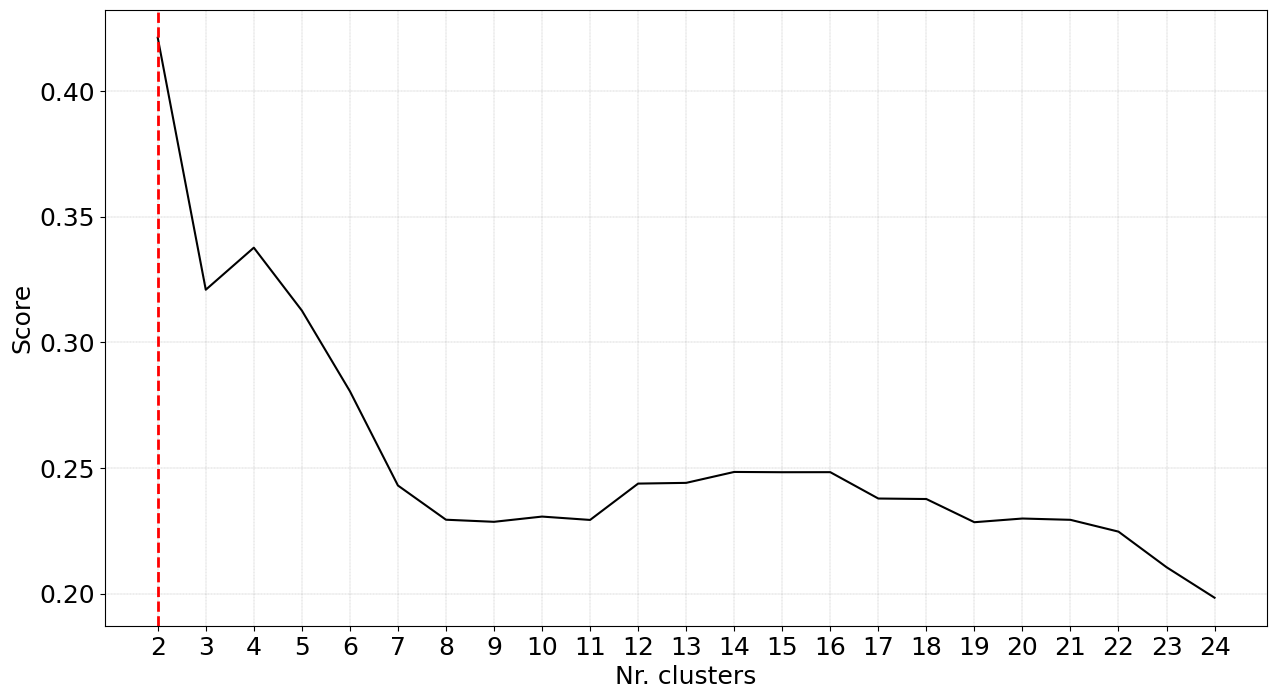

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [47]:
# fit
ce.fit(df_array)

#plot

ce.plot()